In [ ]:
########################################(*)Description of dataset(*)##############################################
#  
#                                     covid19-detection-xray-dataset
#                                                  |
#------------------------------------------------------------------------------------------------------------------
#                      |                             |                                  |
#                  Train_Data                      Valid_data                       Test_Data
#                      |                               |                                |
#    ---------------------------------    -----------------------------     ------------------------------
#        |       |        |        |        |       |      |       |         |         |        |        |
#   Bacterial COVID-19 Normal   Viral  Bacterial COVID-19 Normal Viral  Bacterial   COVID-19   Normal  Viral
#   Pneumonia               Pneumonia  Pneumonia               Pneumonia Pneumonia                    Pneumonia
#
#
####################################################################################################################


In [ ]:
#########################################(*)Task given(*)########################################################

#  1) Getting the X-Ray images of the lungs/chest for detecting COVID-19. ->I have downloaded it from Kaggle.

#  2) Data augmentation has been done.

#  3) I have used VGG16 as transfer learning technique to use the Convolution base layers of pretrained models.

# Note:- I have also downloaded the Resnet50 transfer learning technique but i have not tried it till now but like to try it later.
# Note:- I would also like to use concept of fine tuning so that i can increase accuracy of my classification .  

#  4) Various evaluation like training accuracy, validation accuracy, training/validation error rate,test accuracy/loss has been done .
 
# Note:- I have also shown these evaluation using graph.

#  5) I am sorry sir, i have not prepared report describing the finding of my project till now.

#########################################################################################################################


In [1]:
# Importing the Keras libraries and packages
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout,BatchNormalization
from keras import optimizers
from keras import applications
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math 
import datetime
import time
import tensorflow as tf
from keras.optimizers import Adam

Using TensorFlow backend.
/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64,64,3),strides = (1, 1), name = 'conv0', activation = 'relu'))
classifier.add(BatchNormalization(axis = 3, name = 'bn0'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))



classifier.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-5),
                   metrics=['accuracy'])

In [234]:
         #NOW TIME TO AUGMENTING THE IMAGE
#Now i am using data-generator to reduce overfitting of our model
#for this i shall use .flow_from_directory() to generate batches of image data directly from our directory.

In [3]:
#THIS AUGMENTATION IS FOR TRAINING SET

batch_size=32

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [4]:
#THIS AUGMENTAION IS FOR TEST SET/VALIDATION SET

test_datagen = ImageDataGenerator(rescale = 1./255)

In [237]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install split-folders tqdm


Note: you may need to restart the kernel to use updated packages.


In [8]:
#spliting the dataset folder into train/val/test set

import split_folders

pth='/home/heroo/Downloads/datascence _coursera/Test Corona X-Ray Samples-20200530T113751Z-001/Test Corona X-Ray Samples'


split_folders.ratio(pth, output="output", seed=1337, ratio=(.8, .1, .1)) # default values

Copying files: 280 files [00:01, 145.15 files/s]


In [8]:
#This generator for training set
#target_size= dimension of input shape in cnn
train_pth='/home/heroo/datascience/output/train'
training_set = train_datagen.flow_from_directory(train_pth,
                                                 target_size = (64, 64),
                                                 batch_size =32,
                                                class_mode='binary', 
                                                )


Found 224 images belonging to 2 classes.


In [9]:
total_train_image = len(training_set.filenames) 
total_image_classes = len(training_set.class_indices) 

print('number of image in training set : ',total_train_image)

print('total number of class in training set : ',total_image_classes)

number of image in training set :  224
total number of class in training set :  2


In [31]:
#x_train,y_train=next(training_set)

In [32]:
#x_train.shape

(32, 64, 64, 3)

In [35]:
#print(y_train.shape)

(32,)


(896, 896, 3)


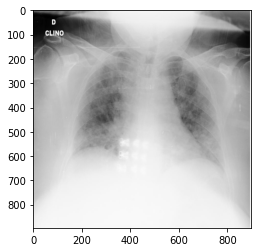

In [314]:
import seaborn as sns
import sys
import os
import ssl
import random
import cv2 
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context

x_path='/home/heroo/datascience/output/train/Corona/Corona1_1.jpg'


if os.path.isfile(x_path):
    img1 = cv2.imread(x_path)
    plt.imshow(img1)
    print(img1.shape)

In [10]:
#convert the training classes into catogory

training_classes = training_set.classes 

# convert the training labels to categorical vectors 
training_classes = to_categorical(training_classes, num_classes=total_image_classes)
print('training classes',training_classes)
print('training classes shape',training_classes.shape)

training classes [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [

In [11]:
training_classes.shape
print(training_classes)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [12]:
#This generator for validation set

valid_pth='/home/heroo/datascience/output/val'

validation_set = test_datagen.flow_from_directory(valid_pth,
                                            target_size = (64, 64),
                                            batch_size = 7,
                                            class_mode ='binary' ,
                                            )



Found 28 images belonging to 2 classes.


In [13]:
total_validation_image = len(validation_set.filenames) 
total_vimage_classes = len(validation_set.class_indices) 

print('number of image in validation set : ',total_validation_image)

print('total number of class in  validation set : ',total_vimage_classes)

number of image in validation set :  28
total number of class in  validation set :  2


(896, 896, 3)


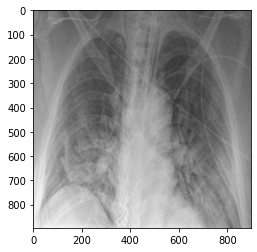

In [16]:
v_path='/home/heroo/datascience/output/val/Corona/Corona1_5.jpg'


if os.path.isfile(v_path):
    img1 = cv2.imread(v_path)
    plt.imshow(img1)
    print(img1.shape)

In [17]:
#convert the validation classes into catogory

validation_classes = validation_set.classes 

# convert the training labels to categorical vectors 
validation_classes = to_categorical(validation_classes, num_classes=total_vimage_classes)
print('validation classes',validation_classes)
print('validation classes shape',validation_classes.shape)

validation classes [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
validation classes shape (28, 2)


In [18]:
#This generator for test set

test_pth='/home/heroo/datascience/output/test'

test_set = test_datagen.flow_from_directory(test_pth,
                                            target_size = (64, 64),
                                            batch_size = 7,
                                            class_mode ='binary' ,
                                            )


Found 28 images belonging to 2 classes.


In [19]:
total_test_image = len(test_set.filenames) 
total_timage_classes = len(test_set.class_indices) 

print('number of image in test set : ',total_test_image)

print('total number of class in  test set : ',total_timage_classes)

number of image in test set :  28
total number of class in  test set :  2


(896, 896, 3)


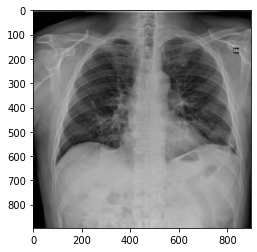

In [20]:
t_path='/home/heroo/datascience/output/test/Corona/Corona1_34.jpg'


if os.path.isfile(t_path):
    img2 = cv2.imread(t_path)
    plt.imshow(img2)
    print(img2.shape)

In [21]:
#convert the test classes into catogory

test_classes = test_set.classes 

# convert the test labels to categorical vectors 
test_classes = to_categorical(test_classes, num_classes=total_timage_classes)
print('test classes',validation_classes)
print('test classes shape',test_classes.shape)

test classes [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
test classes shape (28, 2)


In [42]:
#FITING GENERATOR TO OUR CNN MODEL

classifier.fit_generator(
        training_set,
        steps_per_epoch=224//32,
        nb_epoch=10,
        validation_data=validation_set,
        validation_steps=28//7)


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=7, validation_data=<keras.pre..., validation_steps=4, epochs=10)`
  


Epoch 1/10
7/7 [==============================] - 3s 364ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 2s 330ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 2s 315ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 2s 311ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 2s 322ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 4.0665e-04 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 2s 339ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 8.9356e-04 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 2s 328ms/step - loss: 0.0182 - accuracy: 0.9955 - val_loss: 3.6614e-04 - val_accuracy: 1.0000
Epoch 8/

In [43]:
classifier.save_weights('cnnaugmentation.h5')  # always save your weights after training or during training

In [44]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

In [49]:
y_pridict=classifier.predict_generator(test_set, 28//7)

In [52]:
test_set = test_datagen.flow_from_directory(test_pth,
                                            target_size = (64, 64),
                                            batch_size = 7,
                                            class_mode ='binary' ,
                                            )

x_test,y_test=next(test_set)

pred=classifier.predict(x_test)
pred=np.hstack([pred,1-pred])
pred

Found 28 images belonging to 2 classes.


array([[9.9998558e-01, 1.4424324e-05],
       [9.9988627e-01, 1.1372566e-04],
       [1.2590542e-06, 9.9999875e-01],
       [9.9991059e-01, 8.9406967e-05],
       [9.9980623e-01, 1.9377470e-04],
       [9.9990618e-01, 9.3817711e-05],
       [9.9998057e-01, 1.9431114e-05]], dtype=float32)

non corona


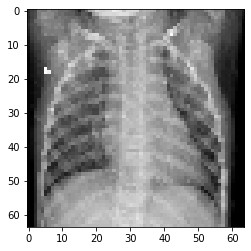

In [59]:
plt.imshow(x_test[1])
if(y_pridict[1]>0.5):
    print('corona')
else:
    print('non corona')
    
    


corona


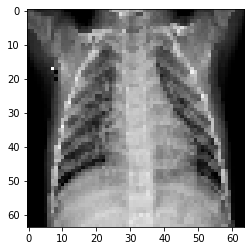

In [60]:
plt.imshow(x_test[6])
if(y_pridict[6]>0.5):
    print('corona')
else:
    print('non corona')

TRANSERFER LEARNING

In [5]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

vg16=keras.applications.VGG16(include_top=False,weights="imagenet")


In [491]:

vg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [492]:
#loading resnet50 weight

model_resnet50 = keras.applications.ResNet50(weights='imagenet',include_top=False)

/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [107]:
# dimensions of our images.
image_width, image_height = 64,64

train_dir = '/home/heroo/datascience/output/train'
validation_dir = '/home/heroo/datascience/output/val'
test_dir='/home/heroo/datascience/output/test'

total_train_image = len(training_set.filenames) 
total_validation_image = len(validation_set.filenames) 
total_test_image = len(test_set.filenames) 

epochs = 10
batch_size =16
v_batch_size=10

In [28]:
 print('total number of train image : ',total_train_image)

total number of train image :  224


In [29]:
 print('total number of valid image : ',total_validation_image)

total number of valid image :  28


In [30]:
 print('total number of test image : ',total_test_image)

total number of test image :  28


In [31]:
#Weight and feature calculation using vgg16 for training set


training_gen = train_datagen.flow_from_directory(train_dir,
        target_size=(image_width, image_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)


bottleneck_features_train = vg16.predict_generator(training_gen, total_train_image//16 )
np.save('bottleneck_features_train.npy',bottleneck_features_train)


Found 224 images belonging to 2 classes.


In [32]:
#Weight and feature calculation using vgg16 for validation set

validation_gen = test_datagen.flow_from_directory( validation_dir,
        target_size=(image_width, image_height),
        batch_size=v_batch_size,
        class_mode=None,
        shuffle=False )



bottleneck_features_validation = vg16.predict_generator(validation_gen,total_validation_image//8)
np.save('bottleneck_features_validation.npy',bottleneck_features_validation)

Found 28 images belonging to 2 classes.


In [33]:
##Weight and feature calculation using vgg16 for test set

test_set = test_datagen.flow_from_directory(test_dir,
        target_size=(image_width, image_height),
        batch_size=v_batch_size,
        class_mode=None,
        shuffle=False )


weight_features_test = vg16.predict_generator(test_set,total_test_image//8) 

np.save('bottleneck_features_test.npy', weight_features_test)


Found 28 images belonging to 2 classes.


In [34]:


training_gen = train_datagen.flow_from_directory(train_dir,
        target_size=(image_width, image_height),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)


Found 224 images belonging to 2 classes.


In [35]:
num_of_classes=2
train_data = np.load('bottleneck_features_train.npy')

train_labels = np.array([0] * (total_train_image// num_of_classes) + [1] * (total_train_image// num_of_classes))



In [36]:
train_data.shape

(224, 2, 2, 512)

In [37]:
train_labels.shape

(224,)

In [38]:


validation_gen = test_datagen.flow_from_directory( validation_dir,
        target_size=(image_width, image_height),
        batch_size=v_batch_size,
        class_mode='binary',
        shuffle=False )

Found 28 images belonging to 2 classes.


In [39]:
num_of_classes=2
validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = np.array([0] * (total_validation_image//num_of_classes) + [1] * (total_validation_image// num_of_classes))


In [40]:
validation_data.shape

(28, 2, 2, 512)

In [41]:
validation_labels.shape

(28,)

In [42]:
test_set = test_datagen.flow_from_directory(test_dir,
        target_size=(image_width, image_height),
        batch_size=v_batch_size,
        class_mode='binary',
        shuffle=False )

Found 28 images belonging to 2 classes.


In [43]:
num_of_classes=2
test_data = np.load('bottleneck_features_test.npy')
test_labels = np.array([0] * (total_test_image//num_of_classes) + [1] * (total_test_image // num_of_classes))


In [44]:
test_data.shape

(28, 2, 2, 512)

In [45]:
test_labels.shape

(28,)

In [68]:
#CREATING NEW cnn  model
vg16 = Sequential()
vg16.add(Flatten(input_shape=train_data.shape[1:]))
vg16.add(Dense(256, activation='relu'))
vg16.add(Dropout(0.5)) 
vg16.add(Dense(128, activation='relu')) 
vg16.add(Dropout(0.3)) 
vg16.add(Dense(units=1, activation='sigmoid'))


vg16.compile(loss='binary_crossentropy',
   optimizer='rmsprop',
   metrics=['accuracy'])



In [69]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

In [70]:
epochs=40

history=vg16.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))

vg16.save_weights('bottleneck_fc_model.h5')

Train on 224 samples, validate on 28 samples
Epoch 1/40
224/224 [==============================] - 1s 4ms/step - loss: 0.4936 - accuracy: 0.7366 - val_loss: 0.1211 - val_accuracy: 0.9643
Epoch 2/40
224/224 [==============================] - 0s 546us/step - loss: 0.1823 - accuracy: 0.9330 - val_loss: 0.3187 - val_accuracy: 0.8214
Epoch 3/40
224/224 [==============================] - 0s 539us/step - loss: 0.1211 - accuracy: 0.9464 - val_loss: 0.0845 - val_accuracy: 0.9643
Epoch 4/40
224/224 [==============================] - 0s 501us/step - loss: 0.0771 - accuracy: 0.9688 - val_loss: 0.0551 - val_accuracy: 0.9643
Epoch 5/40
224/224 [==============================] - 0s 488us/step - loss: 0.0443 - accuracy: 0.9911 - val_loss: 0.0795 - val_accuracy: 0.9643
Epoch 6/40
224/224 [==============================] - 0s 587us/step - loss: 0.0612 - accuracy: 0.9777 - val_loss: 0.0989 - val_accuracy: 0.9643
Epoch 7/40
224/224 [==============================] - 0s 573us/step - loss: 0.0328 - accuracy

In [71]:
 ####validation_loss AND validation_accuracy
(validation_loss, validation_accuracy) = vg16.evaluate( 
    validation_data, validation_labels, batch_size=10,     verbose=1)

print("[INFO] Validation accuracy: {:.2f}%".format(validation_accuracy * 100)) 
print("[INFO] Validation Loss: {}".format(validation_loss)) 

28/28 [==============================] - 0s 266us/step
[INFO] Validation accuracy: 96.43%
[INFO] Validation Loss: 0.5204408969948731


In [72]:
####training_loss AND training_accuracy

(training_loss, training_accuracy) = vg16.evaluate( 
    train_data, train_labels, batch_size=batch_size,     verbose=1)

print("[INFO] Training accuracy: {:.2f}%".format(training_accuracy * 100)) 
print("[INFO] Training Loss: {}".format(training_loss)) 

224/224 [==============================] - 0s 76us/step
[INFO] Training accuracy: 100.00%
[INFO] Training Loss: 2.062065733440686e-05


In [73]:
### test_loss AND test_accuracy
(test_loss, test_accuracy) = vg16.evaluate( 
    test_data, test_labels)


print("[INFO] Test accuracy: {:.2f}%".format(test_accuracy * 100)) 
print("[INFO] Test Loss: {}".format(test_loss)) 

28/28 [==============================] - 0s 67us/step
[INFO] Test accuracy: 100.00%
[INFO] Test Loss: 0.00011265269858995453


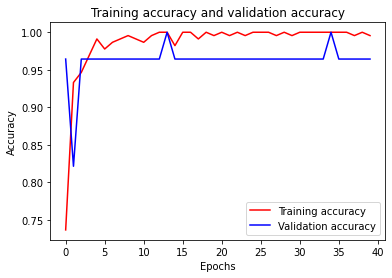

<Figure size 432x288 with 0 Axes>

In [74]:
### Graph beetween training accuracy and validation accuracy
Train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(0,40)
plt.plot(epochs, Train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training accuracy and validation accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.show()

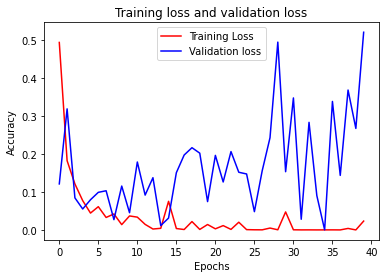

<Figure size 432x288 with 0 Axes>

In [75]:
###Graph beetween training loss and validation loss
Training_Loss = history.history['loss']
validation_loss =history.history['val_loss']
epochs = range(0,40)
plt.plot(epochs, Training_Loss, 'r', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training loss and validation loss')
plt.ylabel('Accuracy') 
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.show()

FINE TUNING :----

In [129]:

from keras.models import Model


In [139]:
model = applications.VGG16(include_top=False,classes=2,input_shape=(64,64,3),weights='imagenet')

top_model=Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dense(128,activation='relu'))
top_model.add(Dense(1,activation='softmax'))
top_model.load_weights('bottleneck_fc_model.h5') 
model= Model(inputs=model.input, output=top_model(model.output)) 


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  if __name__ == '__main__':


In [140]:
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


In [143]:
print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [144]:
batch_size = 16

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

# fine-tune the model
model.fit_generator(
        train_generator,
        steps_per_epoch=total_train_image // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=total_validation_image // batch_size)

Found 224 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Epoch 1/10
14/14 [==============================] - 5s 360ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/10
14/14 [==============================] - 5s 351ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/10
14/14 [==============================] - 5s 350ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/10
14/14 [==============================] - 5s 344ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/10
14/14 [==============================] - 5s 338ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 5.7185 - val_accuracy: 0.6250
Epoch 6/10
14/14 [==============================] - 5s 356ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 10.1662 - val_accuracy: 0.3333
Epoch 7/10
14/14 [==============================] - 5s 386ms/step 

In [291]:
test_set=test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_height, image_width),
        batch_size=28,
        class_mode='binary')

Found 28 images belonging to 2 classes.


In [305]:
test_img,test_lbl1=next(test_set)

In [306]:
y_pred=model.predict(test_img)
y_pred= np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [311]:
test_lbl1=test_lbl1.astype(int)
test_lbl1

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1])

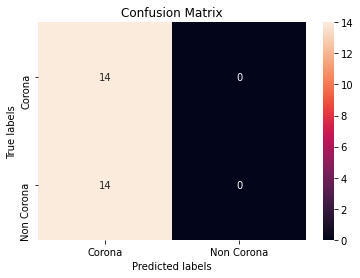

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(test_lbl1,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.yaxis.set_ticklabels(['Corona','Non Corona']); 
ax.xaxis.set_ticklabels([ 'Corona','Non Corona']);

In [273]:
y_pridict=model.predict_generator(test_set)
y_pridict=np.argmax(y_pridict,axis=1)

y_pridict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [274]:
test_lbl = test_set.classes 

# convert the training labels to categorical vectors 
test_lbl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [249]:
#predicted_classes = np.argmax(y_pridict, axis=1)


In [250]:
 from sklearn.metrics import classification_report

In [252]:
 target_names = ['corona', 'non corona']

In [253]:
print(classification_report(test_lbl,y_pridict, 
 target_names=target_names))

              precision    recall  f1-score   support

      corona       0.50      1.00      0.67        14
  non corona       0.00      0.00      0.00        14

    accuracy                           0.50        28
   macro avg       0.25      0.50      0.33        28
weighted avg       0.25      0.50      0.33        28



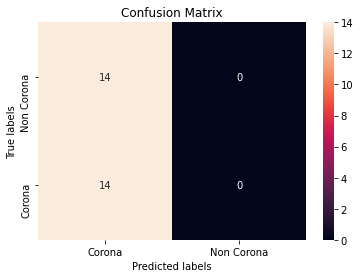

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.yaxis.set_ticklabels(['Non Corona','Corona']); 
ax.xaxis.set_ticklabels([ 'Corona','Non Corona']);

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

corona


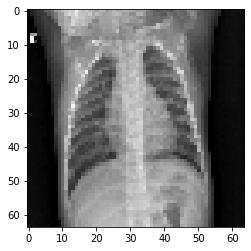

In [152]:
plt.imshow(test_img[1])
if(y_pridict[1]>0.5):
    print('corona')
else:
    print('non corona')
    